# Lifei Wang 
## 8855277
## CSCN8000-Assignment3

1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k
  
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
# load dataset
from sklearn.datasets import load_iris
iris = load_iris()

# display all feature names
feature_name = iris.feature_names
feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# use only petal width and length features
X = iris.data[:, 2:4]

In [10]:
# scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [11]:
# find wcss value
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

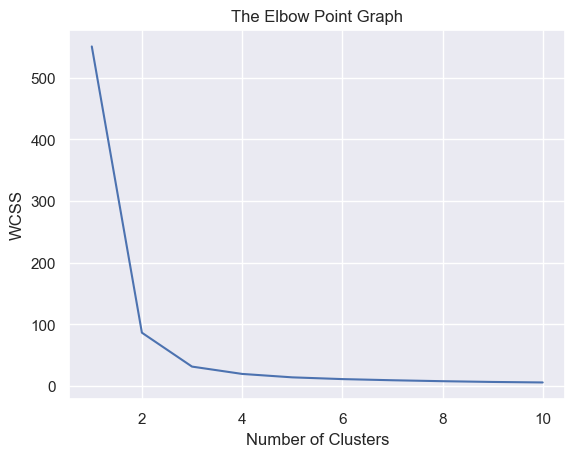

In [12]:
# plot elbow graph
import seaborn as sns
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters is 3

  
2.  Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   

In [14]:
import pandas as pd
df = pd.read_csv('./heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Remove outliers using Z score. 
  
Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3  

In [16]:
from scipy.stats import zscore
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# use z-score
z_score = zscore(df[num_col])
df_outlier_removed = df[(z_score >= -3).all(axis=1) & (z_score <= 3).all(axis=1)]
df_outlier_removed.reset_index(drop=True, inplace=True)
df_outlier_removed.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [18]:
df_outlier_removed.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,132.027809,198.005562,0.232481,136.917686,0.861513,0.547275
std,9.456073,17.120895,107.157779,0.422649,25.356740,1.007626,0.498037
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.000000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,4.000000,1.000000


Convert text columns to numbers using label encoding / one hot encoding

In [22]:
convert_col = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
# label encoding
for col in convert_col:
    # represent data in categorical format
    df_outlier_removed[col] = pd.Categorical(df_outlier_removed[col])
    # convert categorical into numerical values
    df_outlier_removed[col] = df_outlier_removed[col].cat.codes

print('Label encoding:')
df_outlier_removed

Label encoding:


C:\Users\wlf04\AppData\Local\Temp\ipykernel_5204\3952551394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_removed[col] = pd.Categorical(df_outlier_removed[col])
C:\Users\wlf04\AppData\Local\Temp\ipykernel_5204\3952551394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_removed[col] = df_outlier_removed[col].cat.codes


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
894,45,1,3,110,264,0,1,132,0,1.2,1,1
895,68,1,0,144,193,1,1,141,0,3.4,1,1
896,57,1,0,130,131,0,1,115,1,1.2,1,1
897,57,0,1,130,236,0,0,174,0,0.0,1,1


Apply scaling

In [23]:
standard_scaler = StandardScaler()

df_outlier_removed[num_col] = df_outlier_removed[num_col].astype(float)
df_outlier_removed[num_col] = standard_scaler.fit_transform(df_outlier_removed[num_col])
c

C:\Users\wlf04\AppData\Local\Temp\ipykernel_5204\424359322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_removed[num_col] = df_outlier_removed[num_col].astype(float)
C:\Users\wlf04\AppData\Local\Temp\ipykernel_5204\424359322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_removed[num_col] = standard_scaler.fit_transform(df_outlier_removed[num_col])


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,1,1,0.465900,0.849636,0,1,1.384320,0,-0.855469,2,0
1,-0.475855,0,2,1.634714,-0.168122,0,1,0.752973,0,0.137516,1,1
2,-1.745588,1,1,-0.118507,0.793612,0,2,-1.535661,0,-0.855469,2,0
3,-0.581666,0,0,0.349019,0.149344,0,1,-1.141069,1,0.634008,1,1
4,0.053200,1,2,1.050307,-0.028064,0,1,-0.588640,0,-0.855469,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,1,3,-1.287320,0.616205,0,1,-0.194048,0,0.336112,1,1
895,1.534554,1,0,0.699663,-0.046738,1,1,0.161085,0,2.520678,1,1
896,0.370633,1,0,-0.118507,-0.625646,0,1,-0.864854,1,0.336112,1,1
897,0.370633,0,1,-0.118507,0.354763,0,0,1.463238,0,-0.855469,1,1


Build a classification model using various methods (SVM, logistic regression, random forest)

check which model gives you the best accuracy


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
X = df_outlier_removed.drop(columns=['HeartDisease'])
y = df_outlier_removed['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
# Logistic regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
# random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# evaluate each model accuracy
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
log_accuracy = accuracy_score(y_test, log_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

In [30]:
# compare accuracy
print('svm model accuracy', svm_accuracy)
print('log regression model accuracy', log_accuracy)
print('random forest model accuracy', rf_accuracy)

svm model accuracy 0.8611111111111112
log regression model accuracy 0.8555555555555555
random forest model accuracy 0.8722222222222222


The random forest model has the best accuracy score.

Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 


In [31]:
from sklearn.decomposition import PCA
# keep 95% of variance
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(899, 9)

PCA created 9 components

In [32]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [33]:
# retrain random forest model
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
rf_model_pca.score(X_test_pca, y_test)


0.8444444444444444

The accuracy dropped a little bit.

In [34]:
# select only two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(899, 2)

In [35]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [36]:
# retrain random forest model
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
rf_model_pca.score(X_test_pca, y_test)

0.7666666666666667

The accuracy is even less, probably because only 2 components does not have enough information.